In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
from kshape.core import kshape, zscore

## try 2,3,4 clusters on CI alone

In [2]:
path="./2021data/"
df=pd.read_csv(path+'2021_state_CCI.txt',index_col = "date",sep = ",")

In [3]:
df

,North Carolina,Colorado,District of Columbia,Oregon,Louisiana,Wyoming,Virginia,Kentucky,Alaska,Mississippi,...,South Carolina,Minnesota,Connecticut,Maryland,Oklahoma,Georgia,West Virginia,New Jersey,Indiana,North Dakota
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,2.98,2.44,1.60,1.45,3.36,1.21,1.74,2.14,0.67,2.58,...,3.49,1.44,2.11,2.15,2.85,3.36,1.80,2.64,2.15,1.35
2021-01-02,3.01,2.46,1.74,1.46,3.40,1.21,1.77,2.21,0.66,2.60,...,3.57,1.42,2.13,2.20,2.93,3.42,1.86,2.69,2.20,1.41
2021-01-03,3.00,2.44,1.68,1.46,3.39,1.19,1.75,2.23,0.65,2.64,...,3.60,1.42,2.09,2.18,3.00,3.43,1.84,2.64,2.22,1.44
2021-01-04,2.96,2.38,1.62,1.41,3.44,1.19,1.72,2.22,0.64,2.68,...,3.57,1.37,2.02,2.11,3.03,3.41,1.82,2.54,2.21,1.45
2021-01-05,2.89,2.31,1.71,1.36,3.52,1.20,1.69,2.20,0.65,2.76,...,3.55,1.34,1.95,2.06,3.09,3.41,1.78,2.43,2.21,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,6.26,5.57,4.25,4.30,8.70,2.91,3.64,5.01,3.25,6.50,...,7.43,3.77,4.78,4.61,7.20,7.02,4.41,5.70,4.88,3.12
2021-12-28,6.06,5.45,4.36,3.98,8.23,2.84,3.53,4.81,3.11,6.16,...,7.27,3.55,4.50,4.36,6.95,6.80,4.15,5.31,4.68,2.90
2021-12-29,5.87,5.42,5.00,3.72,7.79,2.77,3.43,4.69,2.89,5.80,...,7.07,3.50,4.29,4.14,6.65,6.54,3.97,5.00,4.55,2.96


In [4]:
X = []
for col in df.columns:
    X.append(df[col].values)
X = np.array(X)

In [5]:
for k in [2,3,4]:    
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.5880099760270505
For n_clusters = 3 The average silhouette_score is : 0.5047907302476796
For n_clusters = 4 The average silhouette_score is : 0.4789877068379239


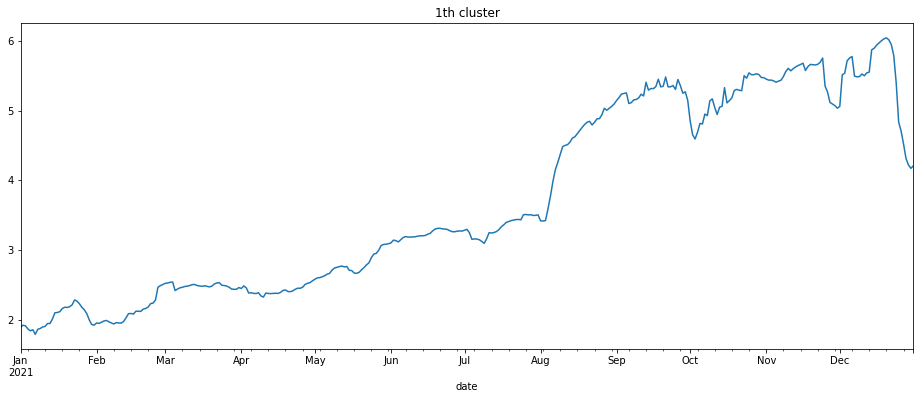

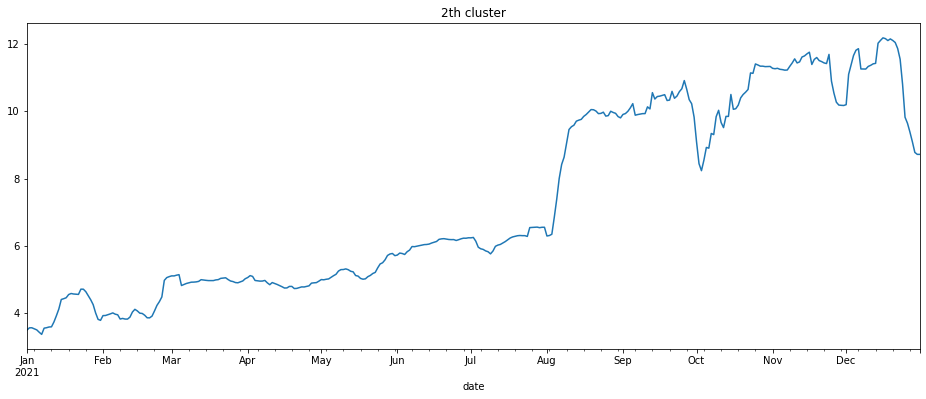

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
i = 0
for c in kmeans.cluster_centers_:
    c_ = pd.Series(c)
    c_.index = pd.to_datetime(df.index)
    c_.plot(figsize = (16,6))
    plt.title(str(i+1)+"th cluster")
    plt.show()
    i+=1

In [7]:
labels = pd.concat([pd.Series(df.columns,name = "state"), pd.Series(kmeans.labels_, name = "label")], axis=1)
labels

,state,label
0,North Carolina,0
1,Colorado,0
2,District of Columbia,0
3,Oregon,0
4,Louisiana,1
5,Wyoming,0
6,Virginia,0
7,Kentucky,0
8,Alaska,0
9,Mississippi,1


In [8]:
import geopandas as gpd

In [59]:
us = gpd.read_file("zip://2021data/cb_2018_us_state_5m.zip")

In [60]:
fil_func = lambda x: x in ["HI","GU","MP","AS","PR","AK","VI"]

In [61]:
sub_us = us[pd.Series(not fil_func(a) for a in us["STUSPS"])]

<AxesSubplot:>

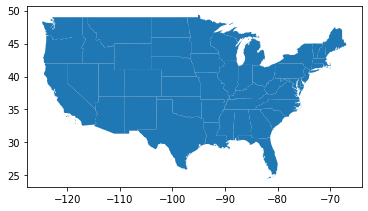

In [62]:
sub_us.plot()

<AxesSubplot:>

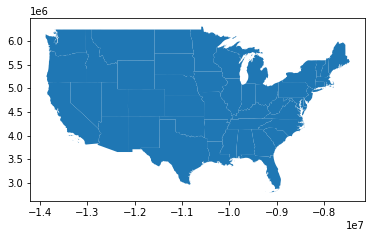

In [63]:
sub_us = sub_us.to_crs("EPSG:3395")
sub_us.plot()

<AxesSubplot:>

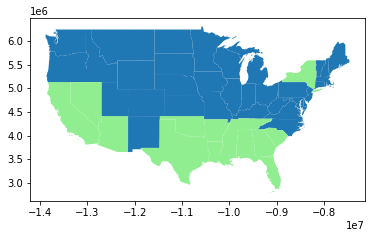

In [70]:
partitioned_us = sub_us.merge(labels,left_on = "NAME",right_on="state",how="left" )
color_mapping = {0: "tab:blue", 1: "lightgreen"}
partitioned_us.plot(color=partitioned_us["label"].map(color_mapping))

## cluster using kshape

In [43]:
path="./2021data/"
ci=pd.read_csv(path+'2021_state_CCI.txt',index_col = "date",sep = ",")
mi=pd.read_csv(path+'2021_state_CMI.txt',index_col = "date",sep = ",")

In [44]:
ci=ci.T

In [45]:
def kshape_clust(t,normalized=True):
    time_series = []
    for f in ci.index:
        time_series.append(list(ci.loc[f].values))
    if normalized:
        clusters = kshape(zscore(time_series,axis=1),2)
    else:
        clusters = kshape(time_series,2)
    cluster0=clusters[0][1]
    cluster1=clusters[1][1]
    kshape_labels = []
    for i in range(len(ci.index)):
        if i in cluster0:
            kshape_labels.append(0)
        else:
            kshape_labels.append(1)
    joined_labels=pd.concat([pd.Series(ci.index,name = "state"),pd.Series(kshape_labels,name="label")],axis=1)
    return joined_labels,clusters

## call kshape normalized

In [46]:
lab,c = kshape_clust(ci)

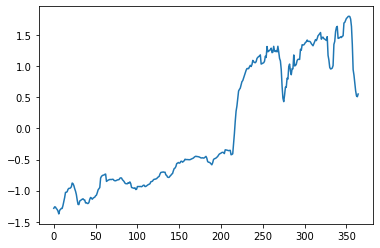

In [47]:
plt.plot(c[0][0])

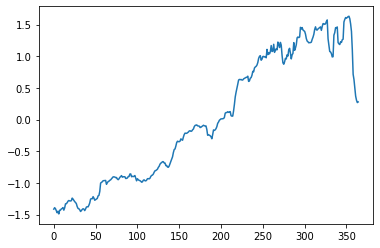

In [48]:
plt.plot(c[1][0])

In [64]:
partitioned_us = sub_us.merge(lab,left_on = "NAME",right_on="state",how="left" )

<AxesSubplot:>

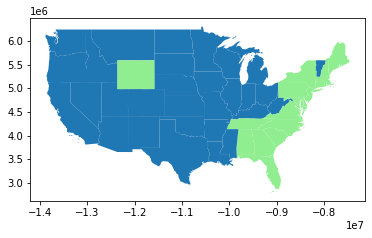

In [69]:
color_mapping = {0: "tab:blue", 1: "lightgreen"}
partitioned_us.plot(color=partitioned_us["label"].map(color_mapping))

In [78]:
lab

,state,label
0,North Carolina,0
1,Colorado,0
2,District of Columbia,0
3,Oregon,0
4,Louisiana,0
5,Wyoming,0
6,Virginia,0
7,Kentucky,0
8,Alaska,1
9,Mississippi,0
